### Import the Main Modules to be Used

In [1]:
# Call up all the important libraries

import time, os

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from scipy.stats import kurtosis
from scipy.stats import skew


from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Normalizer

### Call up Dataset

In [2]:
# Improt The Dataset in CSV file 

df = pd.read_csv('Data_scraped.csv')

## Part 1: Cleaning Dataset 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1008 non-null   int64  
 1   Day              1008 non-null   int64  
 2   Max_Temperature  1008 non-null   int64  
 3   Avg_Temperature  1006 non-null   float64
 4   Min_Temperature  1006 non-null   float64
 5   Max_Dew_Point    1006 non-null   float64
 6   Avg_Dew_Point    1006 non-null   float64
 7   Min_Dew_Point    1006 non-null   float64
 8   Max_Humidity     1006 non-null   float64
 9   Avg_Humidity     1006 non-null   float64
 10  Min_Humidity     1006 non-null   float64
 11  Max_Wind_Speed   1006 non-null   float64
 12  Avg_Wind_Speed   1006 non-null   float64
 13  min_Wind_Speed   1006 non-null   float64
 14  Max_Pressure     1006 non-null   float64
 15  Avg_Pressure     1006 non-null   float64
 16  Min_Pressure     1006 non-null   float64
 17  Precipitation 

In [4]:
# Remove the columns that i will not need to use and Rearrange the columns

df_new=df.drop(df.columns[[2,4,5,7,8,10,11,13,14,16,17]], axis=1)
df_new=df_new[['year','month','Day', 'Avg_Temperature', 'Avg_Dew_Point','Avg_Humidity','Avg_Wind_Speed','Avg_Pressure']]

df_new


,year,month,Day,Avg_Temperature,Avg_Dew_Point,Avg_Humidity,Avg_Wind_Speed,Avg_Pressure
0,2018.0,1.0,1,62.9,24.5,28.2,4.0,27.9
1,2018.0,1.0,2,59.6,30.0,33.5,8.8,27.9
2,2018.0,1.0,3,55.5,29.3,38.4,5.3,28.0
3,2018.0,1.0,4,56.0,26.8,34.7,3.5,28.0
4,2018.0,1.0,5,62.1,30.6,31.1,4.4,27.9
...,...,...,...,...,...,...,...,...
1003,2020.0,12.0,24,62.1,39.8,45.1,5.3,27.9
1004,2020.0,12.0,25,57.8,38.3,50.1,6.1,28.1
1005,2020.0,12.0,26,52.7,22.4,33.8,5.2,28.1
1006,2020.0,12.0,27,52.2,25.8,39.0,3.3,28.1


In [5]:
# Convet the type of columns from objectv to float or intger 

df_new['Day'] = df_new.Day.astype('int')
df_new['month'] = df_new.month.astype('int',errors='ignore')
df_new['year'] = df_new.year.astype('int',errors='ignore')
df_new['Avg_Temperature'] = df_new.Avg_Temperature.astype('float')
df_new['Avg_Dew_Point'] = df_new.Avg_Dew_Point.astype('float')
df_new['Avg_Humidity'] = df_new.Avg_Humidity.astype('float')
df_new['Avg_Wind_Speed'] = df_new.Avg_Wind_Speed.astype('float')
df_new['Avg_Pressure'] = df_new.Avg_Pressure.astype('float')



In [6]:
# Discovering if there are any null in the dataset

df_new[df_new.year.isnull()]

,year,month,Day,Avg_Temperature,Avg_Dew_Point,Avg_Humidity,Avg_Wind_Speed,Avg_Pressure
49,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN


In [7]:
#drop the null in the dataset

df_new=df_new.dropna(subset=['year','month'])

In [8]:
df_new.isnull().sum()

year               0
month              0
Day                0
Avg_Temperature    0
Avg_Dew_Point      0
Avg_Humidity       0
Avg_Wind_Speed     0
Avg_Pressure       0
dtype: int64

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1007
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             1006 non-null   float64
 1   month            1006 non-null   float64
 2   Day              1006 non-null   int32  
 3   Avg_Temperature  1006 non-null   float64
 4   Avg_Dew_Point    1006 non-null   float64
 5   Avg_Humidity     1006 non-null   float64
 6   Avg_Wind_Speed   1006 non-null   float64
 7   Avg_Pressure     1006 non-null   float64
dtypes: float64(7), int32(1)
memory usage: 66.8 KB


In [52]:
#save the clean data set into csv file
df_new.to_csv('Data.Clean.csv')

# Part 2: EDA 

In [11]:
df_new.describe()

,year,month,Day,Avg_Temperature,Avg_Dew_Point,Avg_Humidity,Avg_Wind_Speed,Avg_Pressure
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.00000,1006.000000,1006.000000,1006.000000
mean,2019.001988,6.506958,14.504970,80.612425,38.14841,27.724354,6.537078,27.822763
std,0.816494,3.453378,8.076714,14.917498,9.38514,16.828785,2.820149,0.163630
min,2018.000000,1.000000,1.000000,45.300000,9.40000,7.000000,1.200000,27.500000
25%,2018.000000,4.000000,8.000000,67.300000,31.30000,14.525000,4.400000,27.700000
50%,2019.000000,7.000000,14.500000,82.000000,38.10000,22.750000,6.100000,27.800000
75%,2020.000000,9.750000,21.000000,95.200000,44.50000,37.775000,8.400000,27.900000
max,2020.000000,12.000000,28.000000,105.200000,64.30000,88.900000,21.700000,28.200000


#### Avg_Temperature

C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Temperature'>

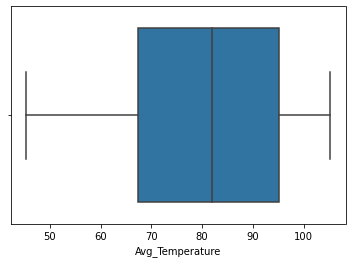

In [12]:
sns.boxplot(df_new['Avg_Temperature'])

#### Avg_Dew_Point

C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Dew_Point'>

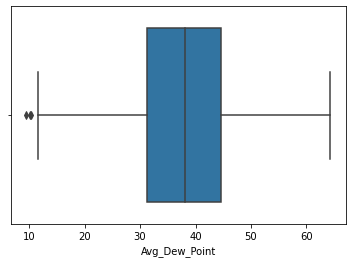

In [13]:
sns.boxplot(df_new['Avg_Dew_Point'])

In [14]:
df_new[df_new['Avg_Dew_Point']<12]

,year,month,Day,Avg_Temperature,Avg_Dew_Point,Avg_Humidity,Avg_Wind_Speed,Avg_Pressure
13,2018.0,1.0,14,57.0,9.4,17.0,3.8,28.0
32,2018.0,2.0,5,58.6,11.6,17.1,1.3,28.1
33,2018.0,2.0,6,62.0,10.4,14.2,1.2,28.1
35,2018.0,2.0,8,64.4,10.1,13.3,2.6,27.9


#### Avg_Humidity

C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Humidity'>

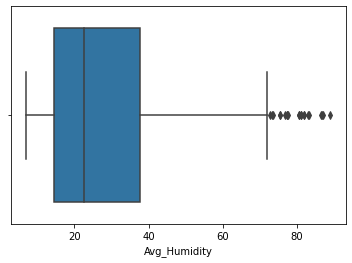

In [15]:
sns.boxplot(df_new['Avg_Humidity'])

In [16]:
df_new[df_new['Avg_Humidity']>70]

,year,month,Day,Avg_Temperature,Avg_Dew_Point,Avg_Humidity,Avg_Wind_Speed,Avg_Pressure
279,2018.0,10.0,28,67.3,59.6,77.3,9.0,28.1
287,2018.0,11.0,8,66.5,60.5,80.5,8.3,27.9
288,2018.0,11.0,9,65.6,61.8,86.9,7.1,27.9
289,2018.0,11.0,10,68.3,62.8,83.3,5.3,27.9
290,2018.0,11.0,11,72.1,64.1,77.2,4.0,27.9
291,2018.0,11.0,12,70.5,64.3,81.8,7.3,28.0
292,2018.0,11.0,13,68.3,60.0,75.3,7.8,27.9
304,2018.0,11.0,25,67.5,59.6,76.7,7.6,27.9
305,2018.0,11.0,26,60.9,51.5,73.1,5.3,28.0
322,2018.0,12.0,15,60.3,53.9,80.6,4.2,28.1


#### Avg_Wind_Speed

C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Wind_Speed'>

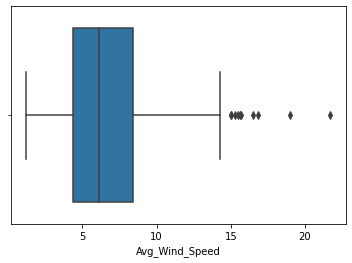

In [17]:
sns.boxplot(df_new['Avg_Wind_Speed'])

In [18]:
df_new[df_new['Avg_Wind_Speed']>14]

,year,month,Day,Avg_Temperature,Avg_Dew_Point,Avg_Humidity,Avg_Wind_Speed,Avg_Pressure
156,2018.0,6.0,17,95.8,29.5,9.7,15.0,27.7
166,2018.0,6.0,27,101.1,30.5,8.9,16.8,27.6
177,2018.0,7.0,10,100.6,29.2,8.6,14.3,27.6
194,2018.0,7.0,27,101.2,30.7,8.7,21.7,27.6
195,2018.0,7.0,28,100.5,30.3,8.9,16.5,27.6
203,2018.0,8.0,8,100.2,29.6,8.7,15.3,27.6
363,2019.0,1.0,28,73.0,38.8,30.0,15.6,27.9
397,2019.0,3.0,6,66.1,28.3,24.6,15.5,27.9
496,2019.0,6.0,21,94.3,26.6,9.2,15.0,27.7
522,2019.0,7.0,19,100.3,37.6,11.8,19.0,27.6


#### Avg_Pressure

C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_Pressure'>

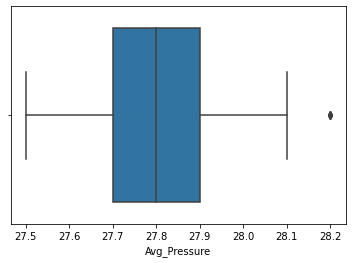

In [19]:
sns.boxplot(df_new['Avg_Pressure'])

In [20]:
df_new[df_new['Avg_Pressure']>28.1]

,year,month,Day,Avg_Temperature,Avg_Dew_Point,Avg_Humidity,Avg_Wind_Speed,Avg_Pressure
339,2019.0,1.0,4,59.4,35.0,42.7,7.3,28.2
662,2019.0,12.0,19,55.1,38.1,55.0,8.8,28.2
686,2020.0,1.0,15,49.5,29.4,46.6,4.6,28.2
697,2020.0,1.0,26,49.0,28.6,46.8,13.4,28.2
698,2020.0,1.0,27,50.7,30.4,48.8,6.0,28.2
711,2020.0,2.0,12,45.3,14.5,30.2,8.0,28.2
712,2020.0,2.0,13,50.7,23.0,35.1,2.0,28.2


### Comment:
#### So you can see above that we have outliers but it will affect our model ? for my situation i think no because is not far from the range of my features.

## pairplot

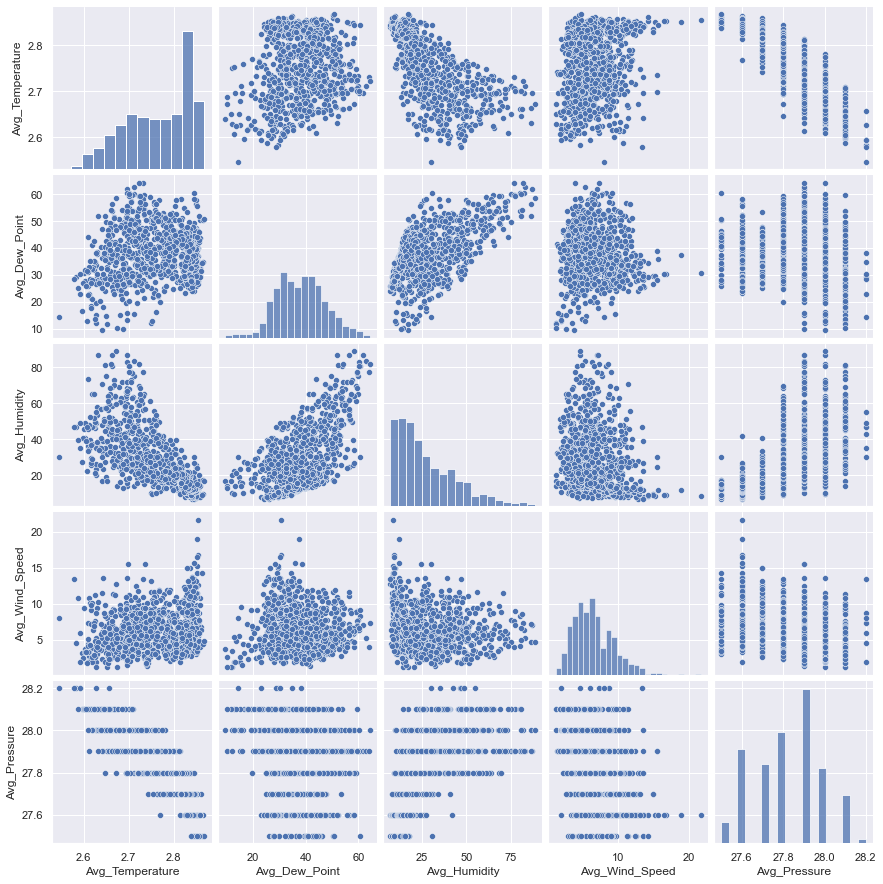

In [50]:
sns.pairplot(df_new[["Avg_Temperature","Avg_Dew_Point","Avg_Humidity","Avg_Wind_Speed","Avg_Pressure"]])

### comment:
#### As is shown above in the pairplot mybe there is corr between the features but, there is no linear line between the the target and the features, but is this will give us no fitting on the modeling?
#### lets see

#### Relationship between Month VS Avg_Temperature

C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Month VS Avg_Temperature Relationship')]

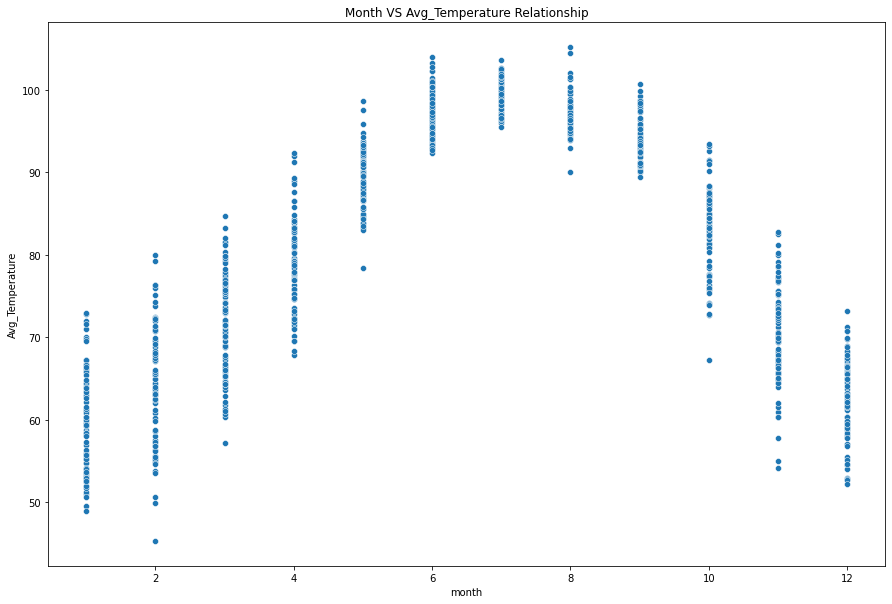

In [23]:
plt.figure(figsize = [15,10])

sns.scatterplot(df['month'], df['Avg_Temperature']).set(title='Month VS Avg_Temperature Relationship')


#### Relationship between Avg_Pressure VS Avg_Temperature

C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Avg_Pressure VS Avg_Temperature Relationship')]

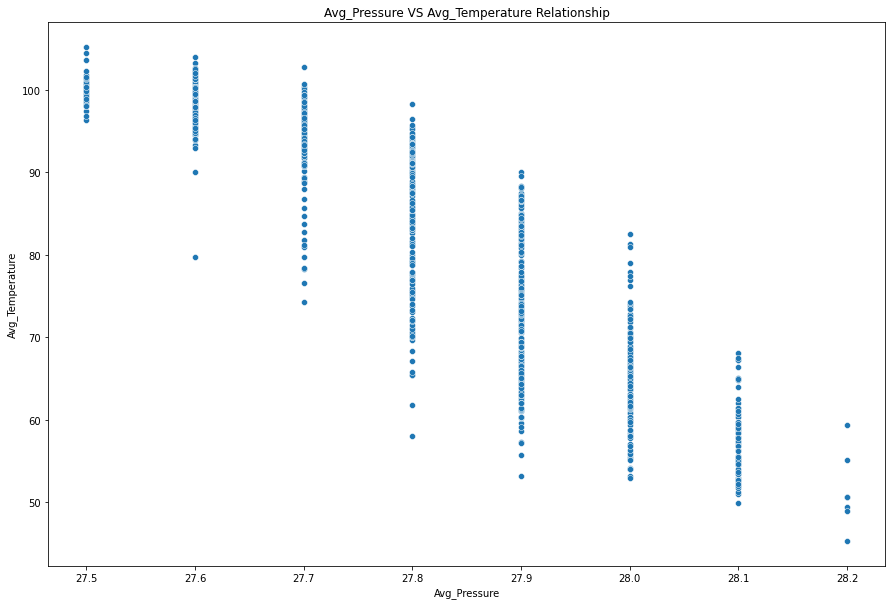

In [24]:
plt.figure(figsize = [15,10])

sns.scatterplot(df['Avg_Pressure'], df['Avg_Temperature']).set(title='Avg_Pressure VS Avg_Temperature Relationship')

#### Relationship between Avg_Humidity VS Avg_Temperature 

C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Avg_Humidity VS Avg_Temperature Relationship')]

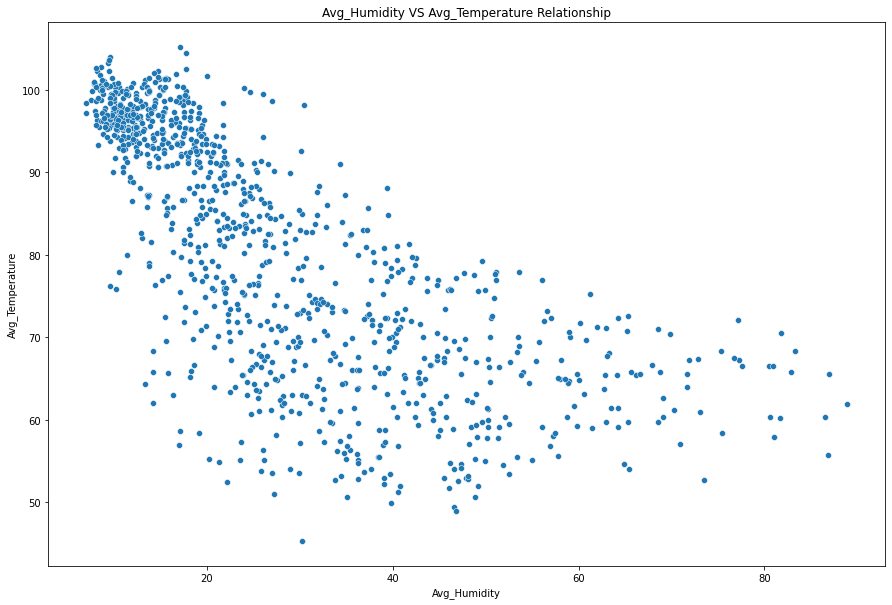

In [25]:
plt.figure(figsize = [15,10])

sns.scatterplot(df['Avg_Humidity'], df['Avg_Temperature']).set(title='Avg_Humidity VS Avg_Temperature Relationship')

#### Relationship between Avg_Humidity VS Avg_Dew_Point 

C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Avg_Humidity VS Avg_Dew_Point Relationship')]

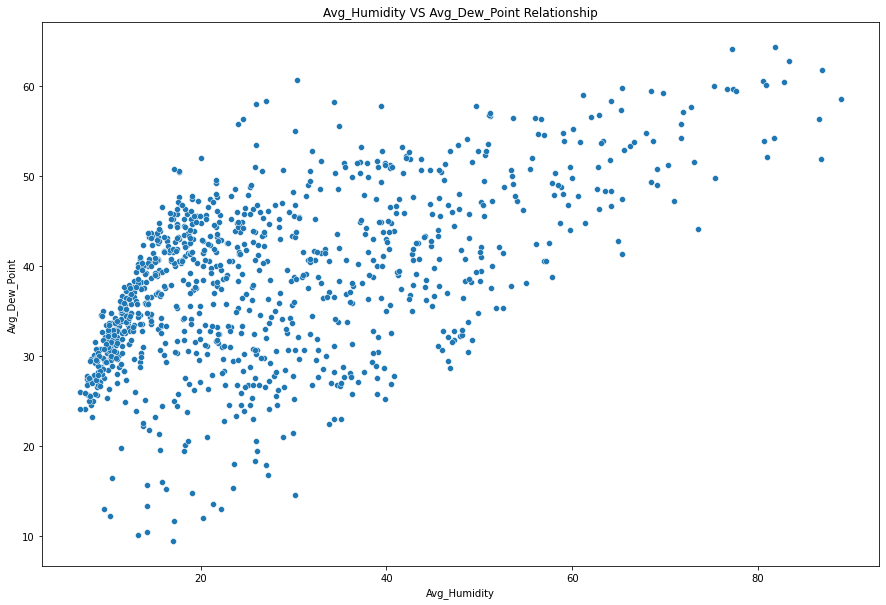

In [26]:
plt.figure(figsize = [15,10])

sns.scatterplot(df['Avg_Humidity'], df['Avg_Dew_Point']).set(title='Avg_Humidity VS Avg_Dew_Point Relationship')

#### Heatmap

<AxesSubplot:>

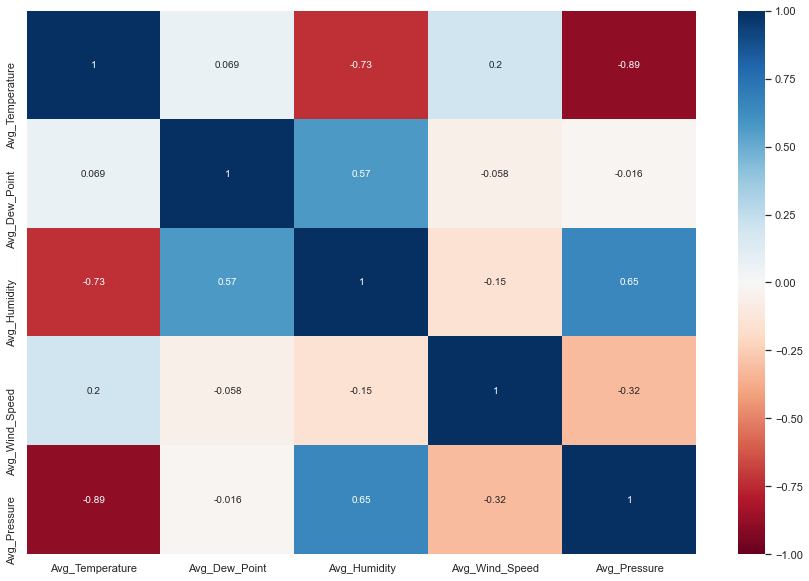

In [27]:
plt.figure(figsize = [15,10])

sns.set(font_scale=1)
sns.heatmap(df_new[["Avg_Temperature","Avg_Dew_Point","Avg_Humidity","Avg_Wind_Speed","Avg_Pressure"]].corr(),annot_kws={"fontsize":10},annot=True,vmin=-1, vmax=1,cmap="RdBu")

C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Temperature', ylabel='Density'>

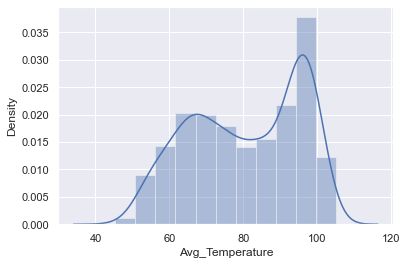

In [28]:
sns.distplot(df_new['Avg_Temperature'])

In [29]:
print(f"the kurtosis of the Avg_Temperature is:{df_new['Avg_Temperature'].kurtosis()}")
print(f"the skew of the Avg_Temperature is:{skew(df_new['Avg_Temperature'])}")


the kurtosis of the Avg_Temperature is:-1.2518734925838353
the skew of the Avg_Temperature is:-0.24563054465493162


### Comment:
#### The above plot and kurtosis score, it telling us that the plot is flat and do not hve a symmertical sides, so i will convert it to be no Skew

Lambda: 1.3893410845744327


<ipython-input-32-8b23172ed8bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Avg_Temperature"]=(np.power(df_new.Avg_Temperature,-0.2282)-1)/-0.2282
C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


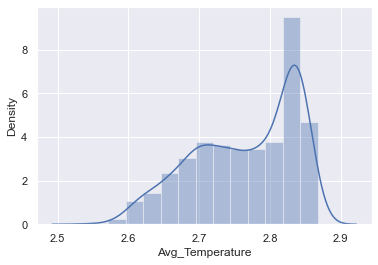

In [32]:
# Make the target to be no skew

lamb=stats.boxcox_normmax(df_new.Avg_Temperature, brack=(-1.9, 1.9)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb)
df_new["Avg_Temperature"]=(np.power(df_new.Avg_Temperature,-0.2282)-1)/-0.2282
sns.distplot(df_new["Avg_Temperature"]);

### Comment:
#### After i convert the targt to be no Skew we got the above plot. i know it is not good but better than the previous

### Chosseing the right model for the dataset

In [30]:
 #ordinary linear regression + w/ ridge regularization


X, y = df_new.drop('Avg_Temperature',axis=1), df_new['Avg_Temperature']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [31]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_ply_r2s = [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lr_poly = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
     #Polynomial feature linear regression
    poly = PolynomialFeatures(degree=2)

    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lr_poly.fit(X_train_poly,y_train)
    cv_lm_ply_r2s.append(lr_poly.score(X_val_poly, y_val))
   
        
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('Polynomial scores: ', cv_lm_ply_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'Polynomial mean cv r^2: {np.mean(cv_lm_ply_r2s):.3f} +- {np.std(cv_lm_ply_r2s):.3f}')

Simple regression scores:  [0.945215936689661, 0.9443048782698984, 0.9361750009728774, 0.9480253530828137, 0.9372405406562819]
Ridge scores:  [0.9450802934569991, 0.9445812686968807, 0.9363619653612095, 0.9477830474712076, 0.9372468093695971] 

Polynomial scores:  [0.9888519247494304, 0.9864996196898456, 0.9863003983688989, 0.9898215057484759, 0.9867078294503662] 

Simple mean cv r^2: 0.942 +- 0.005
Ridge mean cv r^2: 0.942 +- 0.005
Polynomial mean cv r^2: 0.988 +- 0.001


### Comment:
#### After we got the above results i think that the polynomial is the better

# Part 3: Modeling 

### Model 1: Linear Regression

In [34]:
# a sighn x and y

X = df_new[["Avg_Dew_Point","Avg_Humidity","Avg_Wind_Speed","Avg_Pressure"]] 
y = df_new["Avg_Temperature"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [35]:
# Fitting the model into our data

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
pd.DataFrame(lr.coef_, X.columns, columns = ['COEFF'])

,COEFF
Avg_Dew_Point,0.004460
Avg_Humidity,-0.003572
Avg_Wind_Speed,-0.000238
Avg_Pressure,-0.145486


In [37]:
print(f"the intercept of the train data is: {lr.intercept_}")
print(f"the score of the train data is: {lr.score(X_train,y_train)}")

the intercept of the train data is: 6.742149865909929
the score of the train data is: 0.9334914942220736


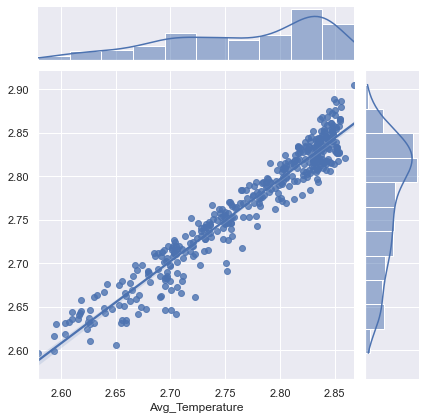

In [38]:
predictions = lr.predict(X_test)
sns.jointplot(x=y_test,y=predictions, kind='reg')


In [39]:
print(f"the score of the test data is:{lr.score(X_test,y_test)}")

the score of the test data is:0.9298694716458178


In [40]:
#The Error

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.014828709615922248
MSE: 0.0003532593853183594
RMSE: 0.01879519580420378


C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


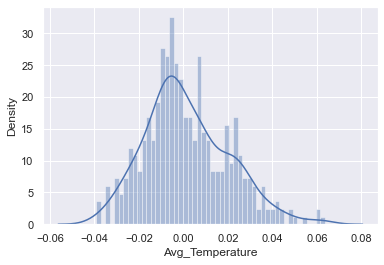

In [41]:
sns.distplot((y_test-predictions),bins=50 );

### Model 2: Polynomial Features

In [42]:
# Create polynomial features

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fitting the model into our data

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [43]:
print(f"the intercept of the train data is: {lr_poly.intercept_}")
print(f"the score of the train data is: {lr_poly.score(X_train_poly,y_train)}")

the intercept of the train data is: 6.4738231677262235
the score of the train data is: 0.991131142502429


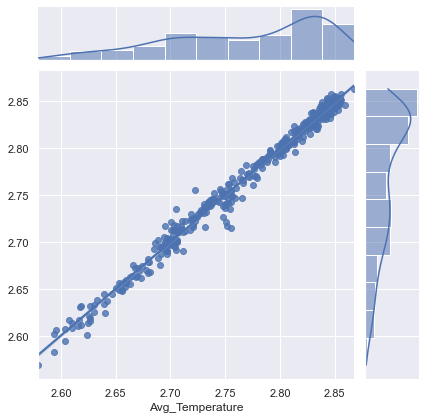

In [44]:
predictions = lr_poly.predict(X_test_poly)
sns.jointplot(x=y_test,y=predictions, kind='reg')

In [45]:
print(f"the score of the test data is:{lr_poly.score(X_test_poly,y_test)}")

the score of the test data is:0.9882711402345689


In [46]:
#The Error

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.005599046504739545
MSE: 5.908025917466757e-05
RMSE: 0.007686368399619392


C:\Users\Microsoft-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


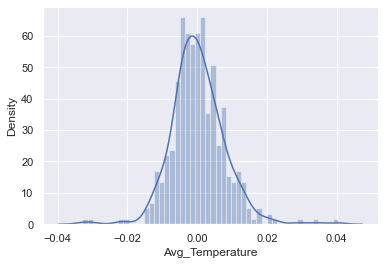

In [47]:
sns.distplot((y_test-predictions),bins=50 );

### comment:
#### After all the modeling we find that my data fitting into each model so my expolation is that i have big data for three years so this gave us a good fitting  also a remove the Skew from the targt 